## EOF Analysis

GOAL: find patterns of global warming within the different models using change in TAS


In [1]:
#imports
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import zarr
from eofs import *
from eofs.standard import Eof
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyEOF
from pyEOF import * #pyEOF did not work for me/was not recognized by anaconda

In [2]:
#open processed data
ds_tas_hist_ssp585 = xr.open_dataset('processed_tas_regional_data.nc')
ds_tas_hist_ssp585

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 45)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) object 'CNRM-CM6-1' 'GISS-E2-1-G' ... 'FGOALS-f3-L'
Data variables:
    tas      (model, lat, lon) float32 ...

In [3]:
tas = ds_tas_hist_ssp585['tas'] #tas in this dataset was alr preprocessed for tas_anomalies
models = ds_tas_hist_ssp585['model']
lat = ds_tas_hist_ssp585['lat']
lon = ds_tas_hist_ssp585['lon']

In [5]:
tas

<xarray.DataArray 'tas' (model: 45, lat: 175, lon: 358)>
[2819250 values with dtype=float32]
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) object 'CNRM-CM6-1' 'GISS-E2-1-G' ... 'FGOALS-f3-L'

In [9]:
#problem was - doing tas.values did not make it have any values ? maybe the solver flattened it 
#because nothign got shown in the plot
# 

In [10]:
#lat weights are applied ... but i alr applied them in pre-processing
coslat = np.cos(np.deg2rad(tas.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas = Eof(tas.values, weights = weights)
#get leading EOF as correlation between the leading PC time series and the input TAS anomalies at each grid pt
eof1_tas = solver_tas.eofsAsCorrelation(neofs=1)
pc1_tas = solver_tas.pcs(npcs=1, pcscaling=1)

In [11]:
eof1_tas.shape

(1, 175, 358)

In [12]:
type(eof1_tas)

numpy.ndarray

In [13]:
eof1_tas = xr.DataArray(eof1_tas, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat, "lon": lon})

In [14]:
eof1_tas

<xarray.DataArray (mode: 1, lat: 175, lon: 358)>
array([[[        nan, -0.76002032, -0.76198366, ..., -0.74973161,
                 nan,         nan],
        [        nan, -0.75950095, -0.75985944, ..., -0.75570664,
                 nan,         nan],
        [        nan, -0.74622198, -0.7476025 , ..., -0.75044211,
                 nan,         nan],
        ...,
        [        nan, -0.91317215, -0.91106263, ..., -0.91826435,
                 nan,         nan],
        [        nan, -0.91106485, -0.91000406, ..., -0.91420391,
                 nan,         nan],
        [        nan, -0.90832985, -0.90809782, ..., -0.9096203 ,
                 nan,         nan]]])
Coordinates:
  * mode     (mode) int32 1
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358

In [15]:
pc1_tas.shape

(45, 1)

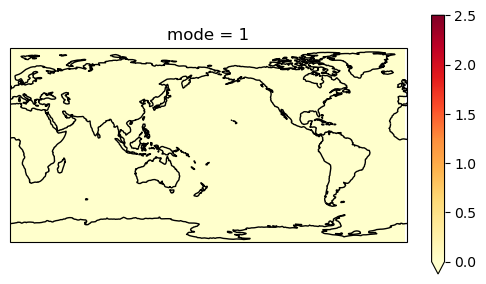

In [19]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), vmin=0, vmax=2.5, cbar_kwargs = {"shrink": 0.7})
img.colorbar.set_ticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])